In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

In [2]:
# We import the dataset
dataset = pd.read_excel("./partos.xlsx")

In [3]:
# We check dataset first
dataset

,Edad,Primeriza,Número de Hijos,Semana de gestación,Parto Múltiple,Cesárea
0,39,False,1,42,False,False
1,25,False,2,42,True,False
2,34,True,1,41,False,False
3,42,False,1,42,False,False
4,17,True,1,42,False,False
5,22,False,3,38,True,True
6,25,False,1,42,False,False
7,35,True,4,41,True,True
8,28,False,2,34,True,True
9,36,False,1,42,False,False


In [4]:
# We check correlation between variables
dataset.corr()

,Edad,Primeriza,Número de Hijos,Semana de gestación,Parto Múltiple,Cesárea
Edad,1.000000,-0.140779,-0.061159,-0.156030,-0.201589,0.129737
Primeriza,-0.140779,1.000000,0.188562,0.240192,0.091287,-0.050000
Número de Hijos,-0.061159,0.188562,1.000000,-0.086808,0.860663,0.518545
Semana de gestación,-0.156030,0.240192,-0.086808,1.000000,-0.182720,-0.824660
Parto Múltiple,-0.201589,0.091287,0.860663,-0.182720,1.000000,0.410792
Cesárea,0.129737,-0.050000,0.518545,-0.824660,0.410792,1.000000


In [5]:
# First we choose our variable target: Cesárea
# we store it appart from the rest of the variables

x_dataset = dataset.iloc[:,0:5]
y_dataset = dataset.iloc[:,5]

In [6]:
y_dataset

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7      True
8      True
9     False
10    False
11    False
12    False
13     True
Name: Cesárea, dtype: bool

In [7]:
# We clean the data
# A good aproach is to first look for collinearity and correlation between variables
x_dataset.corr()

,Edad,Primeriza,Número de Hijos,Semana de gestación,Parto Múltiple
Edad,1.000000,-0.140779,-0.061159,-0.156030,-0.201589
Primeriza,-0.140779,1.000000,0.188562,0.240192,0.091287
Número de Hijos,-0.061159,0.188562,1.000000,-0.086808,0.860663
Semana de gestación,-0.156030,0.240192,-0.086808,1.000000,-0.182720
Parto Múltiple,-0.201589,0.091287,0.860663,-0.182720,1.000000


We confirm that (obviously) there's a high direct correlation between number of newborns and if the birth is multiple.
In this example is more than obvious that 2+ newborns = multiple birth, BUT, when working with huge datasets
or variables that we don't understand is a highly recommended practice to avoid duplicities on data for various reasons:
1. Working with less data and mantaining information is efficient
2. We reduce noise
3. We'll get simpler Decision Trees

In [8]:
# We delete duplicities in variables
x_dataset.drop(['Parto Múltiple'], axis=1)

,Edad,Primeriza,Número de Hijos,Semana de gestación
0,39,False,1,42
1,25,False,2,42
2,34,True,1,41
3,42,False,1,42
4,17,True,1,42
5,22,False,3,38
6,25,False,1,42
7,35,True,4,41
8,28,False,2,34
9,36,False,1,42


In [9]:
dt = DecisionTreeClassifier(criterion="entropy")
dt = dt.fit(x_dataset, y_dataset)

[Text(223.20000000000002, 190.26, 'Semana de gestación <= 41.5\nentropy = 0.863\nsamples = 100.0%\nvalue = [0.714, 0.286]\nclass = y[0]'),
 Text(167.4, 135.9, 'Número de hijos <= 1.5\nentropy = 0.722\nsamples = 35.7%\nvalue = [0.2, 0.8]\nclass = y[1]'),
 Text(111.60000000000001, 81.53999999999999, 'Primeriza <= 0.5\nentropy = 1.0\nsamples = 14.3%\nvalue = [0.5, 0.5]\nclass = y[0]'),
 Text(55.800000000000004, 27.180000000000007, 'entropy = 0.0\nsamples = 7.1%\nvalue = [0.0, 1.0]\nclass = y[1]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.0\nsamples = 7.1%\nvalue = [1.0, 0.0]\nclass = y[0]'),
 Text(223.20000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 21.4%\nvalue = [0.0, 1.0]\nclass = y[1]'),
 Text(279.0, 135.9, 'entropy = 0.0\nsamples = 64.3%\nvalue = [1.0, 0.0]\nclass = y[0]')]

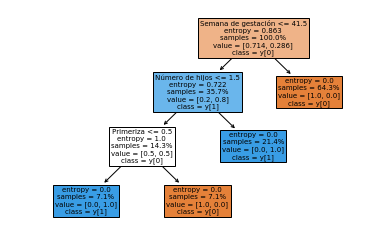

In [11]:
plot_tree(dt, 
          filled=True,
          feature_names=["Edad", "Primeriza", "Número de hijos", "Semana de gestación"], 
          class_names=True, 
          proportion=True)